<a href="https://colab.research.google.com/github/dkg162/MSP/blob/main/MS_COCO_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision timm
# from google.colab import drive
# drive.mount('/content/drive')
!pip install pycocotools

import os
import torch
import torchvision.transforms as transforms
from torchvision.models.segmentation import fcn_resnet50
from torchvision.datasets import CocoDetection
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import timm
from torchvision.transforms.functional import to_pil_image
from pycocotools.coco import COCO

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the path for the COCO dataset
drive_path = '/content/coco_dataset'
os.makedirs(drive_path, exist_ok=True)
os.chdir(drive_path)
os.makedirs('train2017', exist_ok=True)
os.makedirs('val2017', exist_ok=True)
os.makedirs('annotations', exist_ok=True)

# Download COCO data
!wget -nc http://images.cocodataset.org/zips/train2017.zip
!wget -nc http://images.cocodataset.org/zips/val2017.zip
!wget -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# Unzip the data
!unzip -nq train2017.zip -d .
!unzip -nq val2017.zip -d .
!unzip -nq annotations_trainval2017.zip -d .

# Clean up zip files
!rm train2017.zip
!rm val2017.zip
!rm annotations_trainval2017.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
data_dir = '/content/coco_dataset/'



https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

instance annotations

In [ ]:
dataType='val2017'
annFile='{}annotations/instances_{}.json'.format(data_dir,dataType)
print(annFile)

/content/coco_dataset/annotations/instances_val2017.json


In [ ]:
coco=COCO(annFile)


loading annotations into memory...
Done (t=0.81s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen electronic accessory sports furniture indoor person vehicle food appliance animal outdoor


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

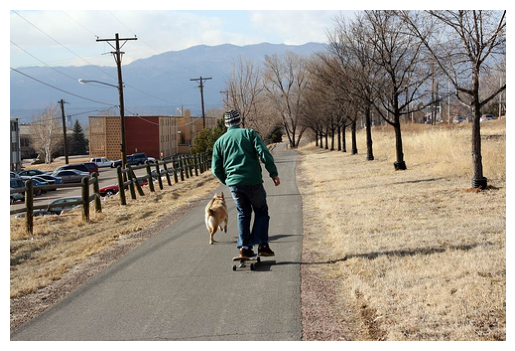

In [ ]:
import skimage.io as io

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

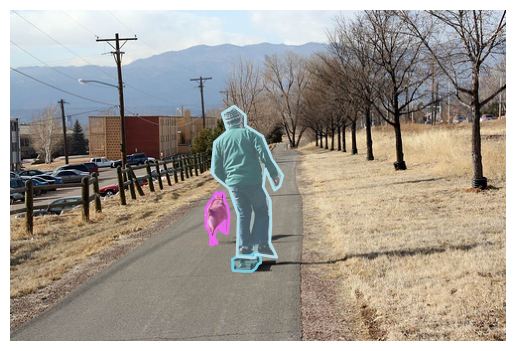

In [ ]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
annFile = '{}annotations/person_keypoints_{}.json'.format(data_dir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


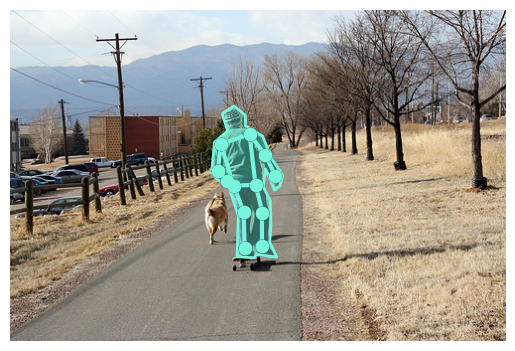

In [ ]:
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [ ]:
annFile = '{}annotations/captions_{}.json'.format(data_dir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


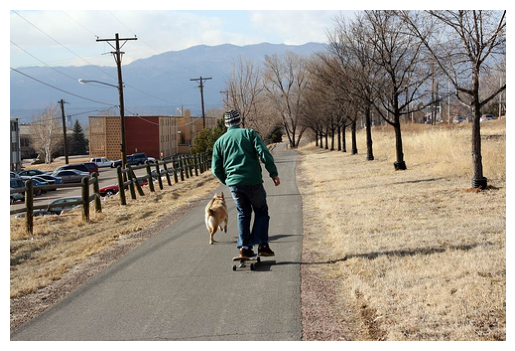

In [ ]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

Image Captioning

In [ ]:
import json
import cv2
from pathlib import Path

In [ ]:
captions_path = f'{data_dir}/annotations/captions_{dataType}.json'
coco_captions = json.loads(Path(captions_path).read_text())
coco_captions = {
    item['image_id']: item['caption']
    for item in coco_captions['annotations']
}

In [ ]:
# Define the directory where the images are stored
images_path = f'{data_dir}/{dataType}'

# Use Path to create a Path object and glob to find all JPEG images
image_paths = Path(images_path).glob('*.jpg')

# Load the images into a dictionary with their IDs as keys
coco_imgs = {
    int(path.stem): cv2.imread(str(path))
    for path in image_paths
}


In [ ]:
from typing import Tuple, List

coco_data: List[Tuple[np.ndarray, str]] = [
    (img_id, coco_imgs[img_id], coco_captions[img_id])
    for img_id in coco_imgs
    if img_id in coco_captions
]

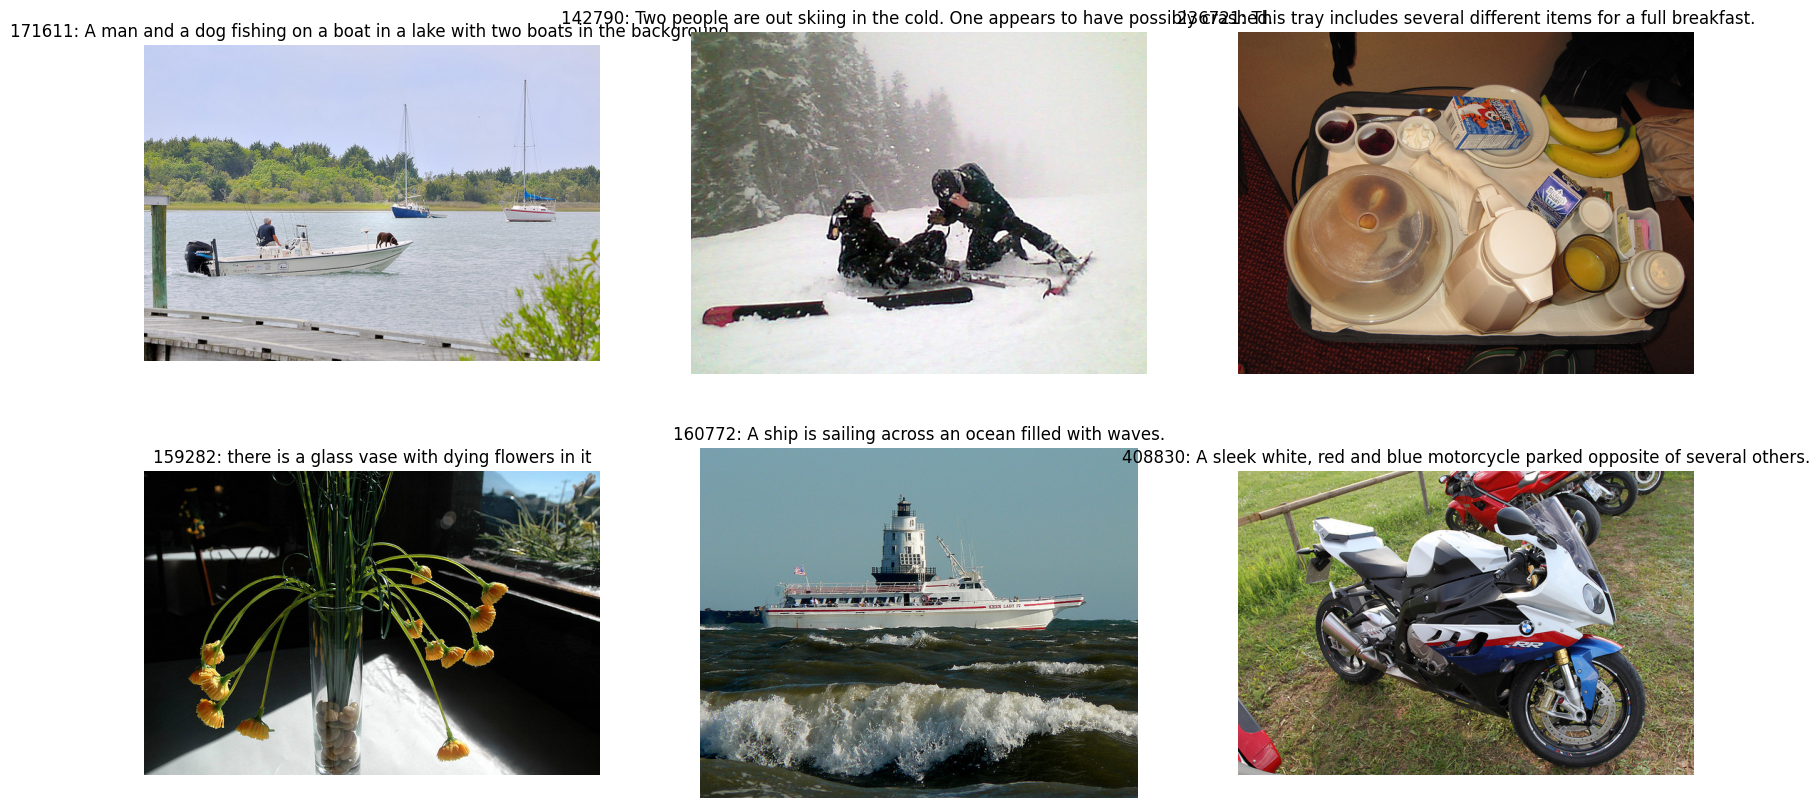

In [ ]:
from itertools import chain, cycle

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, ax in enumerate(chain(list(axs.flatten()))):
    img_id, img, cap = coco_data[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(f'{img_id}: {cap}')
    ax.axis('off')
plt.show()

Data Augmentation
https://github.com/Rounak396/coco_128_analysis/blob/main/COCO%20dataset%20analysis%20with%20Pytorch/coco_dataset_analysis.ipynb

In [ ]:
try:
    import albumentations
except ImportError:
    %pip install albumentations --upgrade

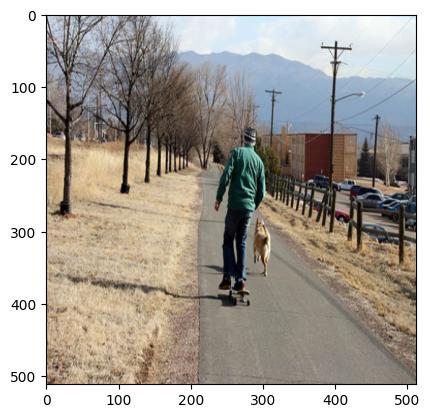

In [ ]:
# Data augmentation
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

transform = A.Compose([ A.Resize(512,512),  # resize the image
                        A.HorizontalFlip(p=0.5),  # horizontal flip
                        A.VerticalFlip(p=0.1),  # Vertical flip
                        A.RandomBrightnessContrast(p=0.2),  # random brightness & contrast
                        A.RandomGamma(p=0.2),  # random gamma
                        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),  # normalize
                        ToTensorV2(),  # convert to tensor
])

transformed = transform(image=I)
plt.imshow(transformed['image'].permute(1,2,0))

In [ ]:
try:
    import tensorboard

except ImportError:
    %pip install tensorboard

In [ ]:
%reload_ext tensorboard


In [ ]:
!python train.py --img 512 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --nosave --cache


python3: can't open file '/content/coco_dataset/train.py': [Errno 2] No such file or directory


Training Coco
https://github.com/leoneversberg/object-detection-pytorch/blob/main/train.ipynb

In [ ]:
# import torch

# # Get cpu, gpu or mps device for training.
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)
!nvcc --version  # Check CUDA compiler version
!nvidia-smi  # Check GPU and driver information

device




2.2.1+cu121
12.1
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Fri Apr 26 21:13:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   38C    P8     

device(type='cuda')

In [ ]:
# from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_fpn, FasterRCNN_MobileNet_V3_Large_FPN_Weights

# def get_faster_rcnn_model(num_classes):
#     model = fasterrcnn_mobilenet_v3_large_fpn(weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT)
#     # Modify the model to adjust to the number of classes
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features, num_classes)
#     model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features * 4, num_classes * 4)
#     return model, FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT.transforms()

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model, preprocess = get_faster_rcnn_model(num_classes=2)

# # Set CUDA_LAUNCH_BLOCKING for better error tracking
# # os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# try:
#     model.to(device)
#     print("Model successfully moved to:", device)
# except RuntimeError as e:
#     print("Failed to move model to device:", device)
#     print("Error:", e)

Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:01<00:00, 69.6MB/s]


Model successfully moved to: cuda


In [ ]:
from torchvision.models.detection import (
    fasterrcnn_mobilenet_v3_large_fpn,
    FasterRCNN_MobileNet_V3_Large_FPN_Weights,
)

NUM_CLASSES = 2  # background=0 included


def get_faster_rcnn_model(num_classes):
    """return model and preprocessing transform"""
    model = fasterrcnn_mobilenet_v3_large_fpn(
        weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT
    )
    model.roi_heads.box_predictor.cls_score = torch.nn.Linear(
        in_features=model.roi_heads.box_predictor.cls_score.in_features,
        out_features=num_classes,
        bias=True,
    )
    model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(
        in_features=model.roi_heads.box_predictor.bbox_pred.in_features,
        out_features=num_classes * 4,
        bias=True,
    )
    preprocess = FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT.transforms()
    return model, preprocess


model, preprocess = get_faster_rcnn_model(num_classes=NUM_CLASSES)
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block):

In [ ]:
import json
from collections import defaultdict
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset


class CocoDataset(Dataset):
    """PyTorch dataset for COCO annotations."""

    # adapted from https://github.com/pytorch/vision/issues/2720

    def __init__(self, root, annFile, transform=None):
        """Load COCO annotation data."""
        self.data_dir = Path(root)
        self.transform = transform

        # load the COCO annotations json
        anno_file_path = annFile
        with open(str(anno_file_path)) as file_obj:
            self.coco_data = json.load(file_obj)
        # put all of the annos into a dict where keys are image IDs to speed up retrieval
        self.image_id_to_annos = defaultdict(list)
        for anno in self.coco_data["annotations"]:
            image_id = anno["image_id"]
            self.image_id_to_annos[image_id] += [anno]

    def __len__(self):
        return len(self.coco_data["images"])

    def __getitem__(self, index):
        """Return tuple of image and labels as torch tensors."""
        image_data = self.coco_data["images"][index]
        image_id = image_data["id"]
        image_path = self.data_dir / image_data["file_name"]
        image = Image.open(image_path)

        annos = self.image_id_to_annos[image_id]
        anno_data = {
            "boxes": [],
            "labels": [],
            "area": [],
            "iscrowd": [],
        }
        for anno in annos:
            coco_bbox = anno["bbox"]
            left = coco_bbox[0]
            top = coco_bbox[1]
            right = coco_bbox[0] + coco_bbox[2]
            bottom = coco_bbox[1] + coco_bbox[3]
            area = coco_bbox[2] * coco_bbox[3]
            anno_data["boxes"].append([left, top, right, bottom])
            anno_data["labels"].append(anno["category_id"])
            anno_data["area"].append(area)
            anno_data["iscrowd"].append(anno["iscrowd"])

        target = {
            "boxes": torch.as_tensor(anno_data["boxes"], dtype=torch.float32),
            "labels": torch.as_tensor(anno_data["labels"], dtype=torch.int64),
            "image_id": torch.tensor([image_id]),
            "area": torch.as_tensor(anno_data["area"], dtype=torch.float32),
            "iscrowd": torch.as_tensor(anno_data["iscrowd"], dtype=torch.int64),
        }

        if self.transform is not None:
            image = self.transform(image)

        return image, target

training dataset size: 118287
validation dataset size: 5000
tensor([[[0.7020, 0.7059, 0.7020,  ..., 0.6510, 0.6549, 0.6627],
         [0.6980, 0.7020, 0.7020,  ..., 0.6510, 0.6549, 0.6588],
         [0.7020, 0.7059, 0.7059,  ..., 0.6471, 0.6510, 0.6588],
         ...,
         [0.4510, 0.4510, 0.4627,  ..., 0.5412, 0.5412, 0.5490],
         [0.4471, 0.4549, 0.4549,  ..., 0.5451, 0.5451, 0.5529],
         [0.4431, 0.4510, 0.4549,  ..., 0.5373, 0.5412, 0.5647]],

        [[0.6314, 0.6353, 0.6392,  ..., 0.5804, 0.5843, 0.5922],
         [0.6275, 0.6314, 0.6392,  ..., 0.5804, 0.5843, 0.5882],
         [0.6314, 0.6353, 0.6431,  ..., 0.5765, 0.5804, 0.5882],
         ...,
         [0.4314, 0.4314, 0.4431,  ..., 0.5020, 0.5020, 0.5098],
         [0.4275, 0.4353, 0.4353,  ..., 0.5059, 0.5059, 0.5137],
         [0.4235, 0.4314, 0.4353,  ..., 0.5020, 0.5020, 0.5137]],

        [[0.5451, 0.5490, 0.5490,  ..., 0.5020, 0.5059, 0.5137],
         [0.5412, 0.5451, 0.5490,  ..., 0.5020, 0.5059, 0.5098]

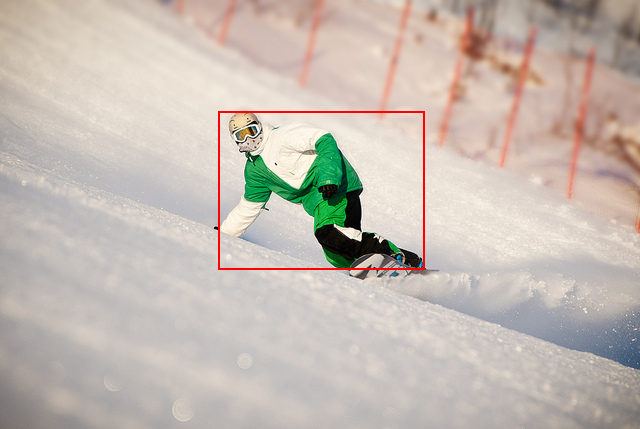

In [ ]:
import torchvision.transforms as T
import random
from IPython.display import display  # to display images
from PIL import ImageDraw

# create datasets
training_dataset = CocoDataset(
    root="/content/coco_dataset/train2017",
    annFile="/content/coco_dataset/annotations/instances_train2017.json",
    transform=preprocess,
)
validation_dataset = CocoDataset(
    root="/content/coco_dataset/valn2017",
    annFile="/content/coco_dataset/annotations/instances_val2017.json",
    transform=preprocess,
)

print(f"training dataset size: {training_dataset.__len__()}")
print(f"validation dataset size: {validation_dataset.__len__()}")

# get a random training sample
img, label = training_dataset[random.randint(0, len(training_dataset) - 1)]
print(img)
print(f"random training label: {label}")

# display image with bbox label
transform = T.ToPILImage()
img = transform(img)
x1, y1, x2, y2 = label["boxes"].numpy()[0]
draw = ImageDraw.Draw(img)
draw.rectangle([x1, y1, x2, y2], fill=None, outline="#ff0000cc", width=2)
display(img)

In [ ]:
def collate(batch):
    """return tuple data"""
    return tuple(zip(*batch))


BATCH_SIZE = 4
train_loader = torch.utils.data.DataLoader(
    training_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4,
    collate_fn=collate,
)

validation_loader = torch.utils.data.DataLoader(
    validation_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4,
    collate_fn=collate,
)

In [ ]:
# get a validation batch
X, y = next(iter(validation_loader))

model.eval()
with torch.no_grad():
    X = [x.to(device) for x in X]
    out = model(X)
    print(out)

Training

In [ ]:
import matplotlib.pyplot as plt

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.00001, momentum=0.9, weight_decay=0.0001)

num_epochs = 40

train_loss_list = []
validation_loss_list = []
model.train()
for epoch in range(num_epochs):
    N = len(train_loader.dataset)
    current_train_loss = 0
    # train loop
    for images, targets in train_loader:
        # move data to device and build the right input format for our model
        images = list(image.to(device) for image in images)
        targets = [
            {
                k: v.to(device) if isinstance(v, torch.Tensor) else v
                for k, v in t.items()
            }
            for t in targets
        ]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        current_train_loss += losses
    train_loss_list.append(current_train_loss / N)

    # validation loop
    N = len(validation_loader.dataset)
    current_validation_loss = 0
    with torch.no_grad():
        for images, targets in validation_loader:
            images = list(image.to(device) for image in images)
            targets = [
                {
                    k: v.to(device) if isinstance(v, torch.Tensor) else v
                    for k, v in t.items()
                }
                for t in targets
            ]

            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            current_validation_loss += losses
    validation_loss_list.append(current_validation_loss / N)

    print(f"epoch: {epoch}")
    print(
        f"train loss: {train_loss_list[-1]}, validation loss: {validation_loss_list[-1]}"
    )

torch.save(model, "./models/model.pth")

# plot losses
train_loss = [x.cpu().detach().numpy() for x in train_loss_list]
validation_loss = [x.cpu().detach().numpy() for x in validation_loss_list]

plt.plot(train_loss, "-o", label="train loss")
plt.plot(validation_loss, "-o", label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

Inference

In [ ]:
img, _ = validation_dataset[random.randint(0, len(validation_dataset) - 1)]
model = torch.load("./models/model.pth")


def inference(img, device, model):
    model.eval()
    with torch.no_grad():
        pred = model([img.to(device)])

    # display image with bbox
    transform = T.ToPILImage()
    img = transform(img)
    x1, y1, x2, y2 = pred[0]["boxes"].cpu().detach().numpy()[0]
    draw = ImageDraw.Draw(img)
    draw.rectangle([x1, y1, x2, y2], fill=None, outline="#ff0000cc", width=2)
    display(img)
    return pred


inference(img, device, model)

Coco with Transformer
https://github.com/DylanCope/Image-Captioning-with-Bimodal-Transformers/blob/master/Image%20Captioning%20with%20Bimodal%20Transformers.ipynb

In [ ]:
import tensorflow as tf
import transformers
PRETRAINED_TRANSFORMER_VERSION = 'albert-base-v2'
Transformer = transformers.TFAlbertModel
Tokenizer = transformers.AlbertTokenizer
# MLMHead = transformers.modeling_tf_albert.TFAlbertMLMHead

In [ ]:
def inceptionv3_preprocess(img, img_size=(128, 129)):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    return tf.keras.applications.inception_v3.preprocess_input(img)

In [ ]:
def create_image_features_extract_model():
    image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                    weights='imagenet')
    new_input = image_model.input
    hidden_layer = image_model.layers[-1].output
    return tf.keras.Model(new_input, hidden_layer)

In [ ]:
tokenizer = Tokenizer.from_pretrained(PRETRAINED_TRANSFORMER_VERSION)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

In [ ]:
print('Vocab size:', tokenizer.vocab_size)
for (name, token), iden in zip(tokenizer.special_tokens_map.items(),
                               tokenizer.all_special_ids):
    print(f'{name}: {token}, ID: {iden}')
print()
print('Input:', cap)
print('Encoded:', tokenizer.encode(cap))

Vocab size: 30000
bos_token: [CLS], ID: 2
eos_token: [SEP], ID: 3
unk_token: <unk>, ID: 1
sep_token: [SEP], ID: 0
pad_token: <pad>, ID: 4

Input: A sleek white, red and blue motorcycle parked opposite of several others.
Encoded: [2, 21, 22630, 359, 15, 402, 17, 705, 7021, 8951, 2794, 16, 238, 654, 9, 3]


In [ ]:
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

def coco_preprocess_batch(coco_batch: list,
                          image_feature_extract_model: tf.keras.Model,
                          tokenizer: Tokenizer):
    iids = [iid for iid, _, _ in coco_batch]
    imgs = [img for _, img, _ in coco_batch]
    caps = [cap for _, _, cap in coco_batch]

    cap_encodings = [tokenizer.encode(cap) for cap in caps]
    x = np.array([inceptionv3_preprocess(img) for img in imgs])
    img_embeddings = image_feature_extract_model(x)
    return list(zip(iids, img_embeddings, cap_encodings))

def make_coco_preprocessed(tokenizer: Tokenizer,
                           batch_size=4):
    image_feature_extract_model = create_image_features_extract_model()
    return [
        record
        for coco_batch in batch(coco_data, batch_size)
        for record in coco_preprocess_batch(coco_batch,
                                            image_feature_extract_model,
                                            tokenizer)
    ]

In [ ]:
import multiprocessing

if __name__ == '__main__':
    # Force the setting of the start method to 'spawn'
    multiprocessing.set_start_method('spawn', force=True)  # Use spawn to avoid issues
    # Continue with your multiprocessing code here



In [ ]:
import numpy as np

def preprocess_and_cache():
    coco_preprocessed = make_coco_preprocessed(tokenizer)
    try:
        # Attempt to save as a regular numpy array
        np.save(preprocessed_coco_cache_path, np.array(coco_preprocessed, dtype=object))
    except ValueError as e:
        # Fallback to saving as a pickle if numpy array fails
        import pickle
        with open(preprocessed_coco_cache_path.with_suffix('.pkl'), 'wb') as f:
            pickle.dump(coco_preprocessed, f)

# Ensure you're calling this block under the 'if __name__ == "__main__":' guard
if __name__ == '__main__':
    multiprocessing.set_start_method('spawn', force=True)  # Use spawn to avoid issues
    p = multiprocessing.Process(target=preprocess_and_cache)
    p.start()
    p.join()


In [ ]:
preprocessed_coco_cache_dir = Path(f'{data_dir}/inception-{PRETRAINED_TRANSFORMER_VERSION}-preprocessed')
preprocessed_coco_cache_dir.mkdir(exist_ok=True)
preprocessed_coco_cache_path = preprocessed_coco_cache_dir / f'{dataType}.npy'
if preprocessed_coco_cache_path.exists():
    print('Loading cached preprocessed data...')
    coco_preprocessed = list(np.load(preprocessed_coco_cache_path,
                                     allow_pickle=True))
    coco_preprocessed = [tuple(x) for x in coco_preprocessed]
else:
    print('Preprocessing and creating cache...')
    def preprocess_and_cache():
        coco_preprocessed = make_coco_preprocessed(tokenizer)
        np.save(preprocessed_coco_cache_path, np.array(coco_preprocessed))

    # Using multiprocess to clear Inception GPU usage when process terminates
    p = multiprocessing.Process(target=preprocess_and_cache)
    p.start()
    p.join()

Preprocessing and creating cache...


In [ ]:
import multiprocessing
import numpy as np
from pathlib import Path

# Define a function to preprocess and save the data
def preprocess_and_cache():
    coco_preprocessed = make_coco_preprocessed(tokenizer)
    # Save using numpy or pickle based on the structure of coco_preprocessed
    try:
        np.save(preprocessed_coco_cache_path, np.array(coco_preprocessed, dtype=object))
    except ValueError:
        import pickle
        with open(preprocessed_coco_cache_path.with_suffix('.pkl'), 'wb') as f:
            pickle.dump(coco_preprocessed, f)
    return coco_preprocessed

# Main code block
if __name__ == '__main__':
    multiprocessing.set_start_method('spawn', force=True)  # Set the multiprocessing start method
    preprocessed_coco_cache_dir = Path(f'{data_dir}/inception-{PRETRAINED_TRANSFORMER_VERSION}-preprocessed')
    preprocessed_coco_cache_dir.mkdir(exist_ok=True)
    preprocessed_coco_cache_path = preprocessed_coco_cache_dir / f'{dataType}.npy'

    if preprocessed_coco_cache_path.exists():
        print('Loading cached preprocessed data...')
        coco_preprocessed = list(np.load(preprocessed_coco_cache_path, allow_pickle=True))
        coco_preprocessed = [tuple(x) for x in coco_preprocessed]
    else:
        print('Preprocessing and creating cache...')
        p = multiprocessing.Process(target=preprocess_and_cache)
        p.start()
        p.join()
        # Load the newly created cache
        coco_preprocessed = list(np.load(preprocessed_coco_cache_path, allow_pickle=True))
        coco_preprocessed = [tuple(x) for x in coco_preprocessed]

    # Now, coco_preprocessed should be defined and you can access its elements
    print(coco_preprocessed[0])


Preprocessing and creating cache...


FileNotFoundError: [Errno 2] No such file or directory: '/content/coco_dataset/inception-albert-base-v2-preprocessed/val2017.npy'

In [ ]:
coco_preprocessed[0]


In [ ]:
coco_train_data, coco_test_data = train_test_split(coco_preprocessed, test_size=0.2)
outputs = (tf.int32, tf.float32, tf.int32)

BUFFER_SIZE = 10000
BATCH_SIZE = 8

coco_train = tf.data.Dataset.from_generator(lambda: cycle(coco_train_data), outputs)

# example sample to define the padding shapes
iid_ex, img_emb_ex, cap_enc_ex = next(iter(coco_train))

coco_train = coco_train.shuffle(BUFFER_SIZE)
coco_train = coco_train.padded_batch(
    BATCH_SIZE,
    padded_shapes=(iid_ex.shape, img_emb_ex.shape, [None]),
    padding_values=(0, 0.0, tokenizer.pad_token_id)
)

coco_test = tf.data.Dataset.from_generator(lambda: cycle(coco_test_data), outputs)

In [ ]:
coco_train

In [ ]:
from torchvision.transforms import Resize, Compose, ToTensor, Normalize
from PIL import Image

class CustomCocoDetection(torch.utils.data.Dataset):
    def __init__(self, root, annotation, image_transforms=None, mask_transforms=None):
        self.coco = COCO(annotation)
        self.root = root
        self.image_transforms = image_transforms
        self.mask_transforms = mask_transforms
        self.ids = list(sorted(self.coco.imgs.keys()))

    def __getitem__(self, index):
        coco = self.coco
        img_id = self.ids[index]
        path = coco.loadImgs(img_id)[0]['file_name']
        img = Image.open(os.path.join(self.root, path)).convert('RGB')

        # Create a full-size mask for all annotations in the image
        mask = np.zeros((coco.imgs[img_id]['height'], coco.imgs[img_id]['width']), dtype=np.uint8)
        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)
        for ann in anns:
            mask = np.maximum(coco.annToMask(ann) * ann['category_id'], mask)

        mask = Image.fromarray(mask)

        # Apply transformations
        if self.image_transforms is not None:
            img = self.image_transforms(img)
        if self.mask_transforms is not None:
            mask = self.mask_transforms(mask)

        return img, to_tensor(mask)

# Define transformations for images and masks
image_transforms = Compose([
    Resize(image_size),  # Resize the image to a fixed size
    ToTensor(),
    Normalize(mean=mean, std=std)
])

mask_transforms = Compose([
    Resize(image_size),  # Resize the mask to the same fixed size
    ToTensor()
])

# Redefine datasets
train_dataset = CustomCocoDetection(root=f'{data_dir}train2017',
                                    annotation=f'{data_dir}annotations/instances_train2017.json',
                                    image_transforms=image_transforms,
                                    mask_transforms=mask_transforms)

val_dataset = CustomCocoDetection(root=f'{data_dir}val2017',
                                  annotation=f'{data_dir}annotations/instances_val2017.json',
                                  image_transforms=image_transforms,
                                  mask_transforms=mask_transforms)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)


In [ ]:
import matplotlib.pyplot as plt

# Assume 'model' has been set to evaluation mode already
model.eval()

with torch.no_grad():
    for images, masks in val_loader:
        images = [image.to(device) for image in images]  # Move images to the device
        masks = [mask.to(device) for mask in masks]  # Move masks to the device

        outputs = model(images)  # Forward pass to get outputs from the model

        # Iterate over each image in the batch
        for image, true_mask, output in zip(images, masks, outputs):
            predicted_mask = output['out']  # Access the output from the dictionary if your model structure uses this key
            predicted_mask = torch.argmax(predicted_mask.squeeze(), dim=0)  # Get the predicted class for each pixel

            # Move image and masks back to CPU for visualization
            image = image.cpu()
            true_mask = true_mask.cpu()
            predicted_mask = predicted_mask.cpu()

            plt.figure(figsize=(15, 5))

            # Display the original image
            plt.subplot(1, 3, 1)
            plt.imshow(transforms.ToPILImage()(image))
            plt.title('Original Image')
            plt.axis('off')

            # Display the ground truth mask
            plt.subplot(1, 3, 2)
            plt.imshow(true_mask.numpy(), cmap='viridis')
            plt.title('Ground Truth Mask')
            plt.axis('off')

            # Display the predicted mask
            plt.subplot(1, 3, 3)
            plt.imshow(predicted_mask.numpy(), cmap='viridis')
            plt.title('Predicted Mask')
            plt.axis('off')

            plt.show()

        # Optionally, break after one batch for quick visualization
        break


In [ ]:

# Function to get the segmentation mask from COCO format
def get_segmentation_mask(image, target, transforms):
    masks = target['masks']
    if transforms is not None:
        image, masks = transforms(image, masks)
    return image, masks

# Prepare the segmentation dataset
train_dataset = CocoDetection(root=f'{data_dir}train2017',
                              annFile=f'{data_dir}annotations/instances_train2017.json',
                              transform=transforms.Compose([
                                  transforms.ToTensor(),  # Convert image and masks to tensor
                              ]))

val_dataset = CocoDetection(root=f'{data_dir}val2017',
                            annFile=f'{data_dir}annotations/instances_val2017.json',
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                            ]))

In [ ]:
# Example model for segmentation
model = fcn_resnet50(pretrained=True)
model.to(device)

# Example DataLoader setup
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

In [ ]:
from torchvision.models.segmentation import fcn_resnet50
from torchvision.models.segmentation.fcn import FCN_ResNet50_Weights

# Load the pretrained weights
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)

# Assuming these are the mean and std values for the pretrained model (common ImageNet values)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Transform for the training dataset
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Transform for the validation dataset
val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Prepare the segmentation dataset using these transforms



In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for images, targets in val_loader:
        images = [image.to(device) for image in images]  # Move images to the device

        outputs = model(images)  # Perform inference

        # Process each image and its corresponding output
        for i, output in enumerate(outputs):
            image = images[i].cpu()
            prediction = output['out']  # Access the output mask predictions
            mask = torch.argmax(prediction, dim=1).squeeze()  # Get the predicted class for each pixel

            # Display the original image
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(transforms.ToPILImage()(image))
            plt.title('Original Image')
            plt.axis('off')

            # Display the predicted mask
            plt.subplot(1, 2, 2)
            plt.imshow(mask.cpu().numpy(), alpha=0.7)
            plt.title('Predicted Mask')
            plt.axis('off')
            plt.show()

        break  # Just show the first batch


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def show_coco_image(dataset, idx):
    img, target = dataset[idx]

    img = transforms.functional.to_pil_image(img)

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for i in range(len(target)):
        bbox = target[i]['bbox']
        label = dataset.coco.loadCats(target[i]['category_id'])[0]['name']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none', label=label)

        ax.add_patch(rect)

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    plt.show()

sample_indices = [0, 10, 20]
for idx in sample_indices:
    show_coco_image(train_dataset, idx)


In [ ]:
# Example model for segmentation
# model = fcn_resnet50(pretrained=True)
model.to(device)

# Example DataLoader setup
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

In [ ]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torchvision.transforms.functional import resized_crop

def transform_both(image, mask):
    # Resize the image and mask to 512x512
    resized_image = Resize((512, 512))(image)
    resized_mask = Resize((512, 512), interpolation=transforms.InterpolationMode.NEAREST)(mask)
    return ToTensor()(resized_image), ToTensor()(resized_mask)

train_transforms = Compose([
    lambda img, mask: transform_both(img, mask)
])

train_dataset = CocoDetection(root=f'{data_dir}train2017',
                              annFile=f'{data_dir}annotations/instances_train2017.json',
                              transforms=train_transforms)  # Passing the transform function here

val_dataset = CocoDetection(root=f'{data_dir}val2017',
                            annFile=f'{data_dir}annotations/instances_val2017.json',
                            transforms=train_transforms)  # Use the same transforms for validation for consistency

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))


In [ ]:
import torchvision.transforms.functional as TF

class MyTransform:
    def __init__(self, output_size=(512, 512)):
        self.output_size = output_size

    def __call__(self, image, target):
        # Resize image
        image = TF.resize(image, self.output_size)
        image = TF.to_tensor(image)

        # Process mask
        mask = target['masks']  # Assuming masks are provided in this format
        # Create a binary mask assuming mask polygons or other format
        mask = torch.zeros_like(image[0], dtype=torch.uint8)  # Assuming first channel shape
        for m in mask:
            mask += TF.to_tensor(TF.resize(m, self.output_size, interpolation=TF.InterpolationMode.NEAREST))

        return image, mask

train_transforms = MyTransform()

train_dataset = CocoDetection(root=f'{data_dir}train2017',
                              annFile=f'{data_dir}annotations/instances_train2017.json',
                              transforms=train_transforms)
val_dataset = CocoDetection(root=f'{data_dir}val2017',
                            annFile=f'{data_dir}annotations/instances_val2017.json',
                            transforms=train_transforms)


In [ ]:
def collate_fn(batch):
    images, masks = zip(*batch)  # Unzip the batch
    images = torch.stack(images, dim=0)  # Stack images
    masks = torch.stack(masks, dim=0)  # Stack masks
    return images, masks

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)


In [ ]:
for epoch in range(num_epochs):
    model.train()
    for images, masks in train_loader:  # Directly use images and masks
        images = images.to(device)
        masks = masks.to(device)  # Ensure masks are correctly processed as tensors

        # Forward pass
        outputs = model(images)['out']

        # Calculate loss
        loss = F.binary_cross_entropy_with_logits(outputs, masks)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


In [ ]:
# Training Loop
for epoch in range(num_epochs):
    model.train()
    for images, targets in train_loader:
        images = images.to(device)
        # You might need to preprocess targets here depending on their format
        masks = [t['masks'] for t in targets]  # Ensure this matches the actual structure
        masks = torch.stack(masks).to(device)  # Convert masks to a suitable tensor

        # Forward pass
        outputs = model(images)['out']

        # Assume masks and outputs are aligned and masks are already tensors
        loss = F.binary_cross_entropy_with_logits(outputs, masks)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Add validation and logging here


In [ ]:
from torch.optim import Adam
import torch.nn.functional as F

# Setup optimizer
optimizer = Adam(model.parameters(), lr=1e-4)

# Define number of epochs
num_epochs = 10

# Training Loop
for epoch in range(num_epochs):
    model.train()
    for images, targets in train_loader:
        images = images.to(device)
        masks = [target["masks"].to(device) for target in targets]  # Adjust based on your mask loader

        # Forward pass
        outputs = model(images)['out']

        # Prepare targets to match output shape if necessary
        masks = torch.stack(masks)  # Example, adjust as necessary
        masks = masks.float()  # Ensuring dtype match

        # Calculate loss
        loss = F.binary_cross_entropy_with_logits(outputs, masks)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation step
    with torch.no_grad():
        model.eval()
        for images, targets in val_loader:
            # Similar processing for validation images and masks
            pass

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


VIT

In [ ]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model = model.to(device)
model.eval()
